In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
df_train = pd.read_csv(r'laptoprice-prodigy\LaptoPrice_train.csv')
df_test = pd.read_csv(r'laptoprice-prodigy\LaptoPrice_test.csv')
df = pd.concat([df_train,df_test],ignore_index=True)
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,535,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,8GB,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.93kg,72940.3200
1,213,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,2.2kg,29250.7200
2,1248,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,2.3kg,30529.4400
3,484,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,2.3kg,30103.2000
4,731,Dell,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,12GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.25kg,34578.7200
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.6016
1299,543,Acer,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,1TB HDD,Nvidia GeForce GTX 1050,Linux,2.4kg,42517.4400
1300,300,Asus,Notebook,14.0,1366x768,Intel Core i3 7100U 2.4GHz,4GB,128GB SSD,Intel HD Graphics 620,Windows 10,1.3kg,27119.5200
1301,64,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.86kg,36763.2000


In [129]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

No missing values

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [131]:
df.duplicated().sum()

np.int64(0)

No duplicate rows

In [132]:
features_object = [feature for feature in df.columns if df[feature].dtype=='object']
print(features_object)

['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight']


In [133]:
df['Company'].value_counts() 

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Xiaomi         4
Vero           4
Google         3
Chuwi          3
LG             3
Fujitsu        3
Huawei         2
Name: count, dtype: int64

In [134]:
df['TypeName'].value_counts() 

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

In [135]:
df['ScreenResolution'].value_counts() 

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [136]:
df['Cpu'].value_counts() 

Cpu
Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     134
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core i7 6920HQ 2.9GHz      1
Intel Core i5 7500U 2.7GHz       1
Intel Core i5 2.0GHz             1
Intel Core M m3 1.2GHz           1
Intel Core i7 2.2GHz             1
Name: count, Length: 118, dtype: int64

In [137]:
df['Ram'].value_counts() 

Ram
8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: count, dtype: int64

In [138]:
df['Ram']=df['Ram'].str.replace('GB','')
df['Ram']=df['Ram'].astype(int)
df['Ram']

0        8
1        8
2        8
3        4
4       12
        ..
1298    16
1299     8
1300     4
1301     8
1302     8
Name: Ram, Length: 1303, dtype: int64

In [139]:
df['Gpu'].value_counts() 

Gpu
Intel HD Graphics 620       281
Intel HD Graphics 520       185
Intel UHD Graphics 620       68
Nvidia GeForce GTX 1050      66
Nvidia GeForce GTX 1060      48
                           ... 
Nvidia GTX 980 SLI            1
Nvidia GeForce GTX 940M       1
Nvidia GeForce GTX 1070M      1
Nvidia GeForce 960M           1
Intel Iris Pro Graphics       1
Name: count, Length: 110, dtype: int64

In [140]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  256GB SSD             2
512GB SSD +  1.0TB Hybrid      

In [141]:
df['OpSys'].value_counts() 

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Windows 10 S       8
Mac OS X           8
Android            2
Name: count, dtype: int64

In [142]:
df['Weight'].value_counts()

Weight
2.2kg     121
2.1kg      58
2.4kg      44
2.3kg      41
2.5kg      38
         ... 
1.31kg      1
2.34kg      1
1.70kg      1
1.14kg      1
2.38kg      1
Name: count, Length: 179, dtype: int64

In [143]:
df['Weight']=df['Weight'].str.replace('kg','')
df['Weight']=df['Weight'].astype(float)
df['Weight']

0       1.93
1       2.20
2       2.30
3       2.30
4       2.25
        ... 
1298    2.04
1299    2.40
1300    1.30
1301    1.86
1302    2.02
Name: Weight, Length: 1303, dtype: float64

In [144]:
df = df.drop(columns='Unnamed: 0',axis=1)
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.93,72940.3200
1,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,2.20,29250.7200
2,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,2.30,30529.4400
3,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,2.30,30103.2000
4,Dell,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,12,1TB HDD,Intel HD Graphics 620,Windows 10,2.25,34578.7200
...,...,...,...,...,...,...,...,...,...,...,...
1298,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016
1299,Acer,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Linux,2.40,42517.4400
1300,Asus,Notebook,14.0,1366x768,Intel Core i3 7100U 2.4GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.30,27119.5200
1301,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.86,36763.2000


In [145]:
features_object = [feature for feature in df.columns if df[feature].dtype=='object']
features_object

['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys']

In [146]:
df["Inches"].value_counts()

Inches
15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
13.5      6
13.9      6
12.0      6
12.3      5
15.4      4
15.0      4
10.1      4
13.0      2
14.1      1
17.0      1
11.3      1
18.4      1
Name: count, dtype: int64

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 112.1+ KB


<Axes: xlabel='Price', ylabel='Count'>

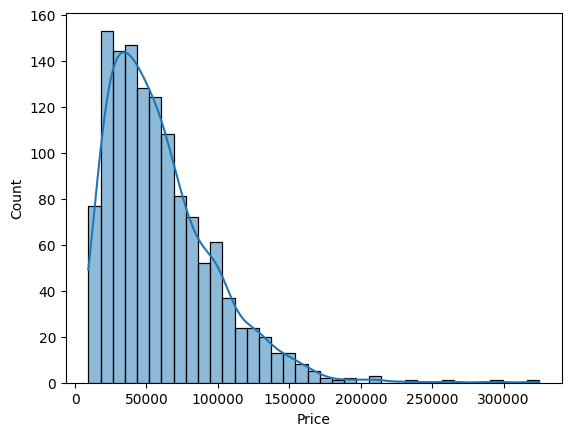

In [148]:
sns.histplot(df['Price'],kde = True)

<Axes: xlabel='Company'>

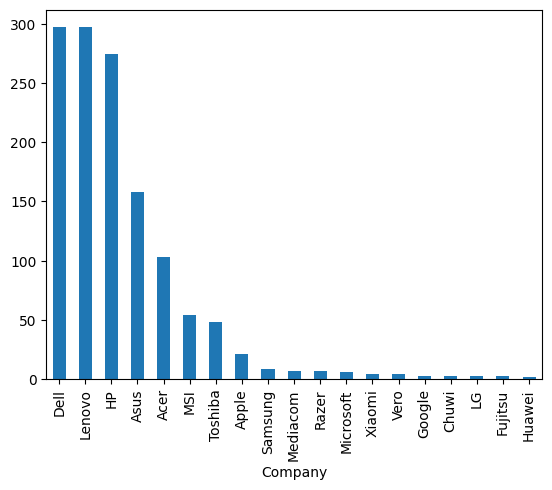

In [149]:
df['Company'].value_counts().plot(kind='bar')

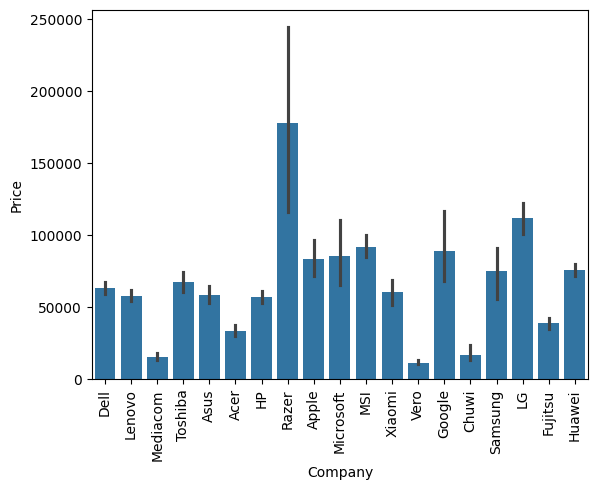

In [150]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='TypeName'>

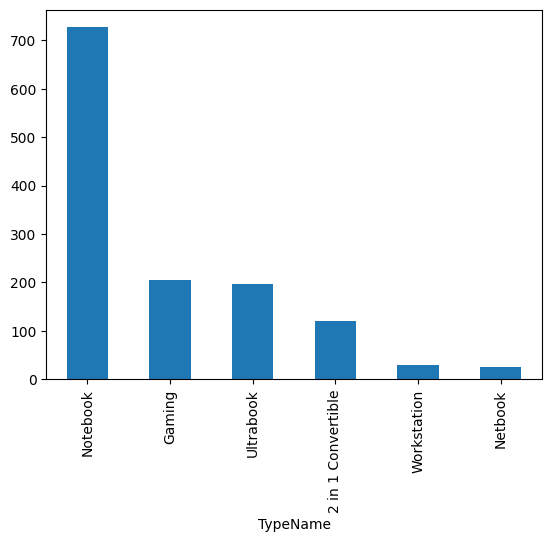

In [151]:
df['TypeName'].value_counts().plot(kind='bar')

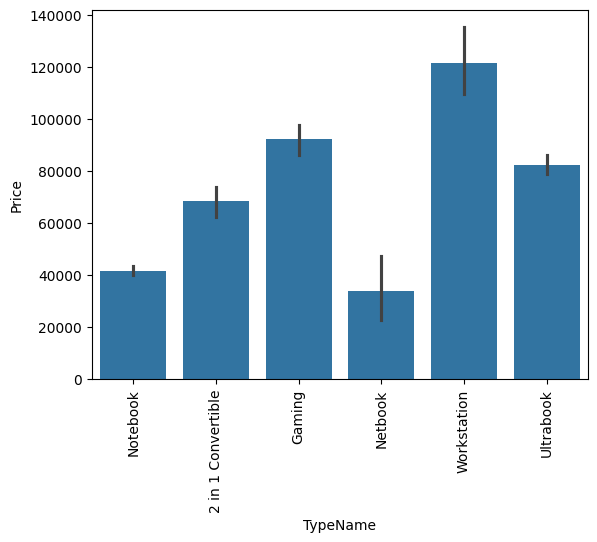

In [152]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

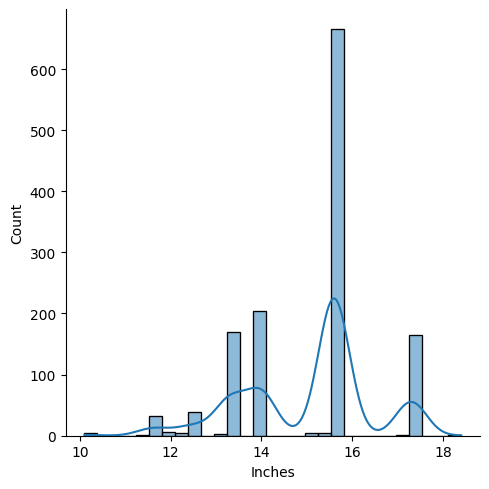

In [153]:
sns.displot(df['Inches'],kde=True)

<Axes: xlabel='Inches', ylabel='Price'>

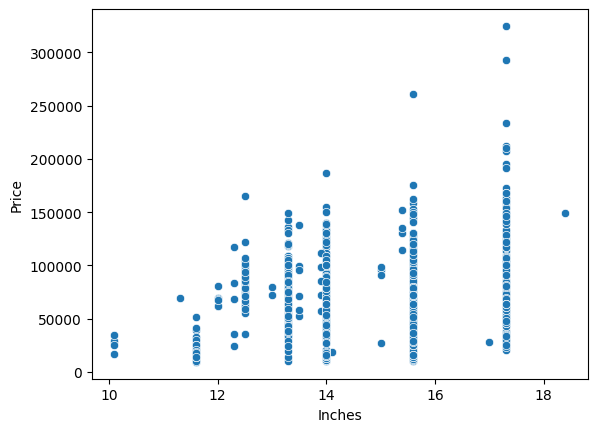

In [154]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [155]:
# ScreenResolution: Extracting width, height, touchscreen, IPS
df['Resolution'] = df['ScreenResolution'].str.extract(r'(\d+x\d+)')  # e.g. '1920x1080'
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)
df[['ResWidth', 'ResHeight']] = df['Resolution'].str.split('x', expand=True).astype(float)  # Split into two cols
df.drop(['ScreenResolution', 'Resolution'], axis=1, inplace=True)  # Drop original

<Axes: xlabel='Touchscreen', ylabel='Price'>

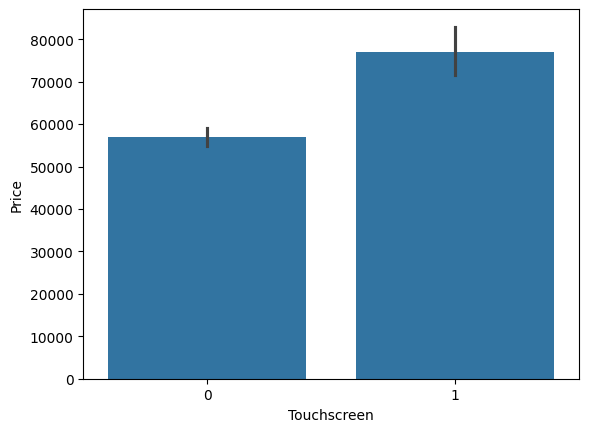

In [156]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

<Axes: xlabel='IPS', ylabel='Price'>

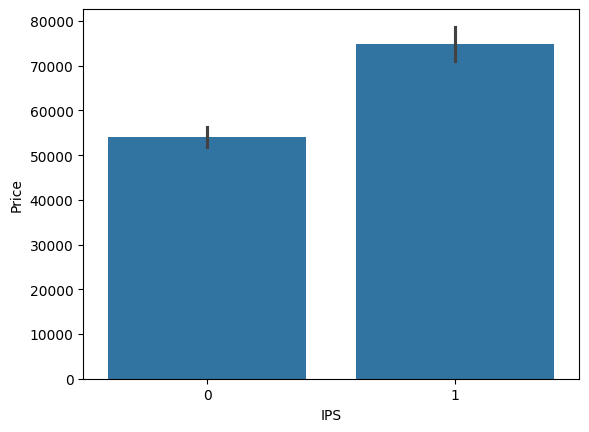

In [157]:
sns.barplot(x=df['IPS'],y=df['Price'])

In [158]:
# Pixels per Inches much more importtant feature compared to inches,width and height
df['PPI'] = ((df['ResWidth']**2+df['ResHeight']**2)**0.5)/df['Inches'].astype(float)

In [159]:
df = df.drop(columns=['Inches','ResWidth','ResHeight'],axis=1)
df

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
0,Dell,Notebook,Intel Core i7 7600U 2.8GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.93,72940.3200,0,0,141.211998
1,Lenovo,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,2.20,29250.7200,0,0,141.211998
2,Lenovo,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,2.30,30529.4400,0,1,141.211998
3,Lenovo,Notebook,Intel Core i3 6006U 2.0GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,2.30,30103.2000,0,0,100.454670
4,Dell,Notebook,Intel Core i5 7200U 2.5GHz,12,1TB HDD,Intel HD Graphics 620,Windows 10,2.25,34578.7200,0,0,100.454670
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Apple,Ultrabook,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,1,220.534624
1299,Acer,Gaming,Intel Core i5 7300HQ 2.5GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Linux,2.40,42517.4400,0,0,141.211998
1300,Asus,Notebook,Intel Core i3 7100U 2.4GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.30,27119.5200,0,0,111.935204
1301,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.86,36763.2000,0,0,141.211998


In [160]:
# Cpu: Extracting brand & type, speed (GHz)
df['Cpu Name'] = df['Cpu'].apply(lambda x: " ".join(x.split()[0:3])) 
df['CpuSpeed'] = df['Cpu'].str.extract(r'(\d+\.?\d*)GHz').astype(float)  # e.g., 2.8
df.drop('Cpu', axis=1, inplace=True)
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Name,CpuSpeed
0,Dell,Notebook,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.93,72940.3200,0,0,141.211998,Intel Core i7,2.8
1,Lenovo,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,2.20,29250.7200,0,0,141.211998,Intel Core i5,2.5
2,Lenovo,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,2.30,30529.4400,0,1,141.211998,Intel Core i5,2.5
3,Lenovo,Notebook,4,128GB SSD,Intel HD Graphics 520,Windows 10,2.30,30103.2000,0,0,100.454670,Intel Core i3,2.0
4,Dell,Notebook,12,1TB HDD,Intel HD Graphics 620,Windows 10,2.25,34578.7200,0,0,100.454670,Intel Core i5,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Apple,Ultrabook,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,1,220.534624,Intel Core i7,2.2
1299,Acer,Gaming,8,1TB HDD,Nvidia GeForce GTX 1050,Linux,2.40,42517.4400,0,0,141.211998,Intel Core i5,2.5
1300,Asus,Notebook,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.30,27119.5200,0,0,111.935204,Intel Core i3,2.4
1301,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.86,36763.2000,0,0,141.211998,Intel Core i5,2.5


In [161]:
def processor(text):
    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text
    else:
        if text.split()[0]=='Intel':
            return "Other Intel processor"
        else:
            return "AMD processor"
df['Cpu brand'] = df['Cpu Name'].apply(processor)
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Name,CpuSpeed,Cpu brand
0,Dell,Notebook,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.93,72940.3200,0,0,141.211998,Intel Core i7,2.8,Intel Core i7
1,Lenovo,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,2.20,29250.7200,0,0,141.211998,Intel Core i5,2.5,Intel Core i5
2,Lenovo,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,2.30,30529.4400,0,1,141.211998,Intel Core i5,2.5,Intel Core i5
3,Lenovo,Notebook,4,128GB SSD,Intel HD Graphics 520,Windows 10,2.30,30103.2000,0,0,100.454670,Intel Core i3,2.0,Intel Core i3
4,Dell,Notebook,12,1TB HDD,Intel HD Graphics 620,Windows 10,2.25,34578.7200,0,0,100.454670,Intel Core i5,2.5,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Apple,Ultrabook,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,1,220.534624,Intel Core i7,2.2,Intel Core i7
1299,Acer,Gaming,8,1TB HDD,Nvidia GeForce GTX 1050,Linux,2.40,42517.4400,0,0,141.211998,Intel Core i5,2.5,Intel Core i5
1300,Asus,Notebook,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.30,27119.5200,0,0,111.935204,Intel Core i3,2.4,Intel Core i3
1301,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.86,36763.2000,0,0,141.211998,Intel Core i5,2.5,Intel Core i5


<Axes: xlabel='Cpu brand'>

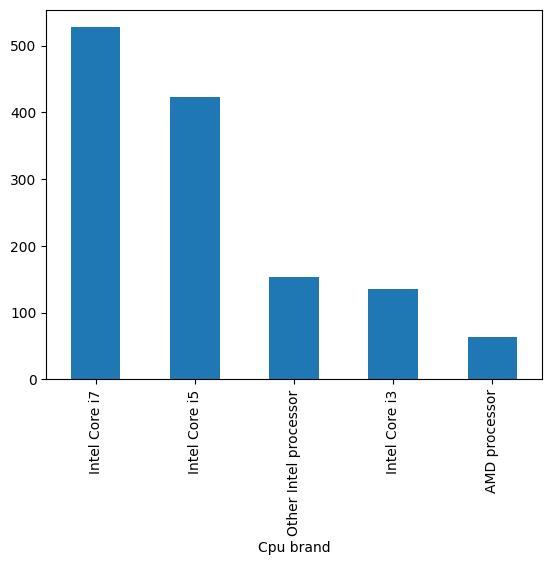

In [162]:
df['Cpu brand'].value_counts().plot(kind='bar')

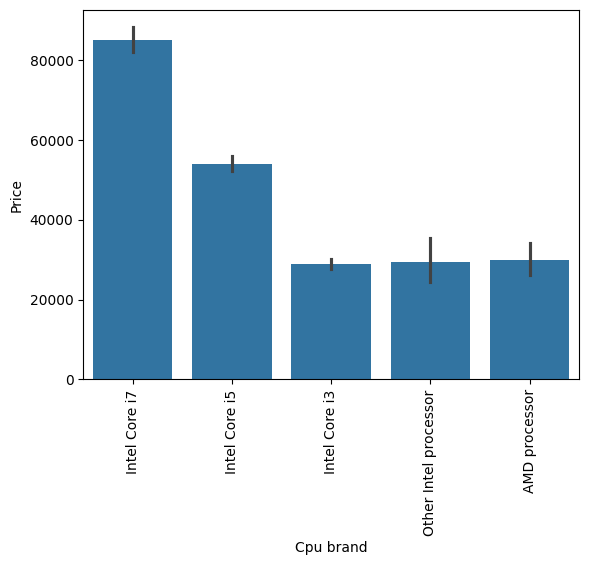

In [164]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [165]:
df = df.drop(columns=['Cpu Name'],axis=1)
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CpuSpeed,Cpu brand
0,Dell,Notebook,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.93,72940.3200,0,0,141.211998,2.8,Intel Core i7
1,Lenovo,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,2.20,29250.7200,0,0,141.211998,2.5,Intel Core i5
2,Lenovo,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,2.30,30529.4400,0,1,141.211998,2.5,Intel Core i5
3,Lenovo,Notebook,4,128GB SSD,Intel HD Graphics 520,Windows 10,2.30,30103.2000,0,0,100.454670,2.0,Intel Core i3
4,Dell,Notebook,12,1TB HDD,Intel HD Graphics 620,Windows 10,2.25,34578.7200,0,0,100.454670,2.5,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Apple,Ultrabook,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,1,220.534624,2.2,Intel Core i7
1299,Acer,Gaming,8,1TB HDD,Nvidia GeForce GTX 1050,Linux,2.40,42517.4400,0,0,141.211998,2.5,Intel Core i5
1300,Asus,Notebook,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.30,27119.5200,0,0,111.935204,2.4,Intel Core i3
1301,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.86,36763.2000,0,0,141.211998,2.5,Intel Core i5


In [ ]:
# Cleaning the strings to make them easier to parse
df['Memory'] = df['Memory'].astype(str).replace(r'\.0', '', regex=True) # Added 'r'
df['Memory'] = df['Memory'].str.replace('GB', '')
df['Memory'] = df['Memory'].str.replace('TB', '000') 

# Spliting the memory into two potential layers
new = df['Memory'].str.split("+", n = 1, expand = True)
df["first"] = new[0].str.strip()
df["second"] = new[1].fillna("0").str.strip()

# Creating boolean flags for storage types
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash"] = df["first"].apply(lambda x: 1 if "Flash" in x else 0)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash"] = df["second"].apply(lambda x: 1 if "Flash" in x else 0)

# Extracting only the digits using Raw Strings
df['first'] = df['first'].str.extract(r'(\d+)').astype(int) # Added 'r'
df['second'] = df['second'].str.extract(r'(\d+)').astype(int) # Added 'r'

# 5. Calculate the total capacity for each drive type
df["HDD"] = (df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"])
df["SSD"] = (df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"])
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"])
df["Flash_Storage"] = (df["first"] * df["Layer1Flash"] + df["second"] * df["Layer2Flash"])

# Droping temporary columns
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
                 'Layer1Flash', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
                 'Layer2Flash', 'Memory'], inplace=True)

df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CpuSpeed,Cpu brand,Layer1Flash_Storage,Layer2Flash_Storage,HDD,SSD,Hybrid,Flash_Storage
0,Dell,Notebook,8,Nvidia GeForce 930MX,Windows 10,1.93,72940.32,0,0,141.211998,2.8,Intel Core i7,0,0,0,256,0,0
1,Lenovo,Notebook,8,Intel HD Graphics 620,No OS,2.20,29250.72,0,0,141.211998,2.5,Intel Core i5,0,0,0,256,0,0
2,Lenovo,Notebook,8,Intel HD Graphics 620,No OS,2.30,30529.44,0,1,141.211998,2.5,Intel Core i5,0,0,0,256,0,0
3,Lenovo,Notebook,4,Intel HD Graphics 520,Windows 10,2.30,30103.20,0,0,100.454670,2.0,Intel Core i3,0,0,0,128,0,0
4,Dell,Notebook,12,Intel HD Graphics 620,Windows 10,2.25,34578.72,0,0,100.454670,2.5,Intel Core i5,0,0,1000,0,0,0


In [173]:
df.corr(numeric_only=True)['Price']

Ram                    0.743007
Weight                 0.210370
Price                  1.000000
Touchscreen            0.191226
IPS                    0.252208
PPI                    0.473487
CpuSpeed               0.430293
Layer1Flash_Storage   -0.210823
Layer2Flash_Storage         NaN
HDD                   -0.096441
SSD                    0.670799
Hybrid                 0.007989
Flash_Storage         -0.040511
Name: Price, dtype: float64

In [175]:
df = df.drop(columns=['Layer1Flash_Storage','Layer2Flash_Storage','Hybrid','Flash_Storage'],axis=1)
df

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CpuSpeed,Cpu brand,HDD,SSD
0,Dell,Notebook,8,Nvidia GeForce 930MX,Windows 10,1.93,72940.3200,0,0,141.211998,2.8,Intel Core i7,0,256
1,Lenovo,Notebook,8,Intel HD Graphics 620,No OS,2.20,29250.7200,0,0,141.211998,2.5,Intel Core i5,0,256
2,Lenovo,Notebook,8,Intel HD Graphics 620,No OS,2.30,30529.4400,0,1,141.211998,2.5,Intel Core i5,0,256
3,Lenovo,Notebook,4,Intel HD Graphics 520,Windows 10,2.30,30103.2000,0,0,100.454670,2.0,Intel Core i3,0,128
4,Dell,Notebook,12,Intel HD Graphics 620,Windows 10,2.25,34578.7200,0,0,100.454670,2.5,Intel Core i5,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Apple,Ultrabook,16,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,1,220.534624,2.2,Intel Core i7,0,0
1299,Acer,Gaming,8,Nvidia GeForce GTX 1050,Linux,2.40,42517.4400,0,0,141.211998,2.5,Intel Core i5,1000,0
1300,Asus,Notebook,4,Intel HD Graphics 620,Windows 10,1.30,27119.5200,0,0,111.935204,2.4,Intel Core i3,0,128
1301,HP,Notebook,8,Intel HD Graphics 620,Windows 10,1.86,36763.2000,0,0,141.211998,2.5,Intel Core i5,0,256


In [ ]:
df['GpuBrand'] = df['Gpu'].apply(lambda x: x.split()[0])

<Axes: xlabel='GpuBrand'>

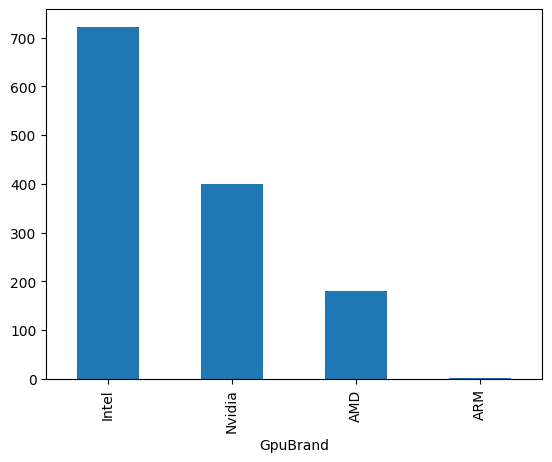

In [177]:
df['GpuBrand'].value_counts().plot(kind='bar')

In [178]:
df[df['GpuBrand']=="ARM"]

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CpuSpeed,Cpu brand,HDD,SSD,GpuBrand
1082,Samsung,2 in 1 Convertible,4,ARM Mali T860 MP4,Chrome OS,1.15,35111.52,1,1,234.5074,2.0,AMD processor,0,0,ARM


In [179]:
df = df[df['GpuBrand']!="ARM"]
df

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CpuSpeed,Cpu brand,HDD,SSD,GpuBrand
0,Dell,Notebook,8,Nvidia GeForce 930MX,Windows 10,1.93,72940.3200,0,0,141.211998,2.8,Intel Core i7,0,256,Nvidia
1,Lenovo,Notebook,8,Intel HD Graphics 620,No OS,2.20,29250.7200,0,0,141.211998,2.5,Intel Core i5,0,256,Intel
2,Lenovo,Notebook,8,Intel HD Graphics 620,No OS,2.30,30529.4400,0,1,141.211998,2.5,Intel Core i5,0,256,Intel
3,Lenovo,Notebook,4,Intel HD Graphics 520,Windows 10,2.30,30103.2000,0,0,100.454670,2.0,Intel Core i3,0,128,Intel
4,Dell,Notebook,12,Intel HD Graphics 620,Windows 10,2.25,34578.7200,0,0,100.454670,2.5,Intel Core i5,1000,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Apple,Ultrabook,16,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,1,220.534624,2.2,Intel Core i7,0,0,Intel
1299,Acer,Gaming,8,Nvidia GeForce GTX 1050,Linux,2.40,42517.4400,0,0,141.211998,2.5,Intel Core i5,1000,0,Nvidia
1300,Asus,Notebook,4,Intel HD Graphics 620,Windows 10,1.30,27119.5200,0,0,111.935204,2.4,Intel Core i3,0,128,Intel
1301,HP,Notebook,8,Intel HD Graphics 620,Windows 10,1.86,36763.2000,0,0,141.211998,2.5,Intel Core i5,0,256,Intel


<Axes: xlabel='GpuBrand', ylabel='Price'>

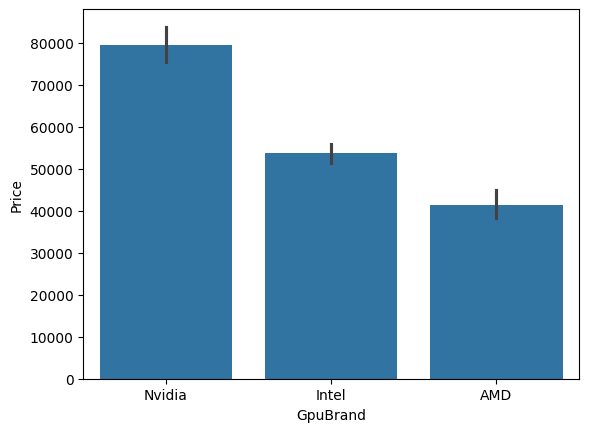

In [180]:
sns.barplot(x=df['GpuBrand'],y=df['Price'])


In [181]:
df = df.drop(columns=['Gpu'], axis=1)
df

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,CpuSpeed,Cpu brand,HDD,SSD,GpuBrand
0,Dell,Notebook,8,Windows 10,1.93,72940.3200,0,0,141.211998,2.8,Intel Core i7,0,256,Nvidia
1,Lenovo,Notebook,8,No OS,2.20,29250.7200,0,0,141.211998,2.5,Intel Core i5,0,256,Intel
2,Lenovo,Notebook,8,No OS,2.30,30529.4400,0,1,141.211998,2.5,Intel Core i5,0,256,Intel
3,Lenovo,Notebook,4,Windows 10,2.30,30103.2000,0,0,100.454670,2.0,Intel Core i3,0,128,Intel
4,Dell,Notebook,12,Windows 10,2.25,34578.7200,0,0,100.454670,2.5,Intel Core i5,1000,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Apple,Ultrabook,16,Mac OS X,2.04,114017.6016,0,1,220.534624,2.2,Intel Core i7,0,0,Intel
1299,Acer,Gaming,8,Linux,2.40,42517.4400,0,0,141.211998,2.5,Intel Core i5,1000,0,Nvidia
1300,Asus,Notebook,4,Windows 10,1.30,27119.5200,0,0,111.935204,2.4,Intel Core i3,0,128,Intel
1301,HP,Notebook,8,Windows 10,1.86,36763.2000,0,0,141.211998,2.5,Intel Core i5,0,256,Intel


In [182]:
#  OpSys: Grouping into broader categories
def group_os(os):
    if 'Windows' in os:
        return 'Windows'
    elif 'Mac' in os or 'macOS' in os:
        return 'Mac'
    elif 'Linux' in os:
        return 'Linux'
    else:
        return 'Other'
df['OpSysGroup'] = df['OpSys'].apply(group_os)
df.drop('OpSys', axis=1, inplace=True)
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,CpuSpeed,Cpu brand,HDD,SSD,GpuBrand,OpSysGroup
0,Dell,Notebook,8,1.93,72940.3200,0,0,141.211998,2.8,Intel Core i7,0,256,Nvidia,Windows
1,Lenovo,Notebook,8,2.20,29250.7200,0,0,141.211998,2.5,Intel Core i5,0,256,Intel,Other
2,Lenovo,Notebook,8,2.30,30529.4400,0,1,141.211998,2.5,Intel Core i5,0,256,Intel,Other
3,Lenovo,Notebook,4,2.30,30103.2000,0,0,100.454670,2.0,Intel Core i3,0,128,Intel,Windows
4,Dell,Notebook,12,2.25,34578.7200,0,0,100.454670,2.5,Intel Core i5,1000,0,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Apple,Ultrabook,16,2.04,114017.6016,0,1,220.534624,2.2,Intel Core i7,0,0,Intel,Mac
1299,Acer,Gaming,8,2.40,42517.4400,0,0,141.211998,2.5,Intel Core i5,1000,0,Nvidia,Linux
1300,Asus,Notebook,4,1.30,27119.5200,0,0,111.935204,2.4,Intel Core i3,0,128,Intel,Windows
1301,HP,Notebook,8,1.86,36763.2000,0,0,141.211998,2.5,Intel Core i5,0,256,Intel,Windows


<Axes: xlabel='OpSysGroup', ylabel='Price'>

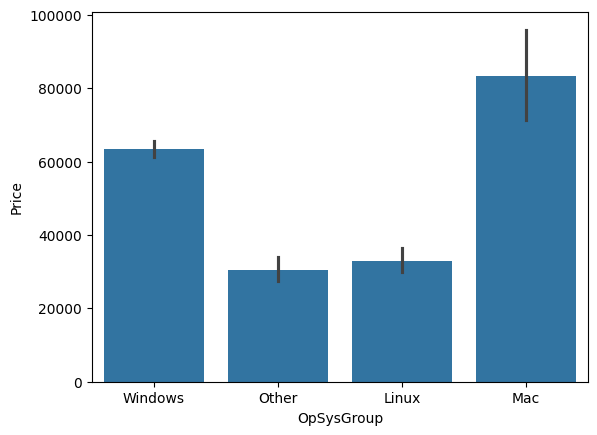

In [ ]:
sns.barplot(x=df['OpSysGroup'],y=df['Price'])

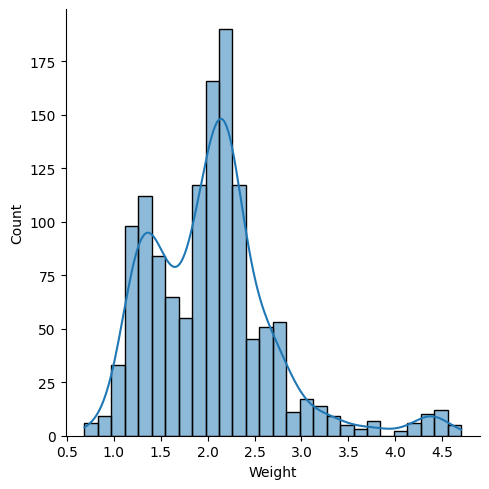

In [185]:
sns.displot(df['Weight'],kde=True)

In [186]:
df.corr(numeric_only=True)['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
IPS            0.253320
PPI            0.475368
CpuSpeed       0.430122
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<Axes: >

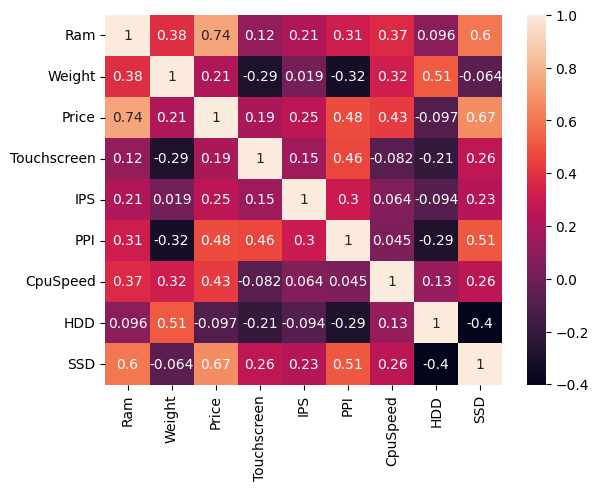

In [188]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: xlabel='Price', ylabel='Count'>

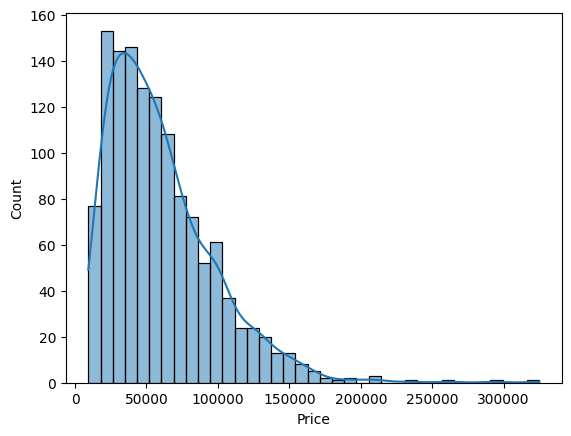

In [189]:
sns.histplot(df['Price'],kde=True)

Skewed right now

<Axes: xlabel='Price', ylabel='Count'>

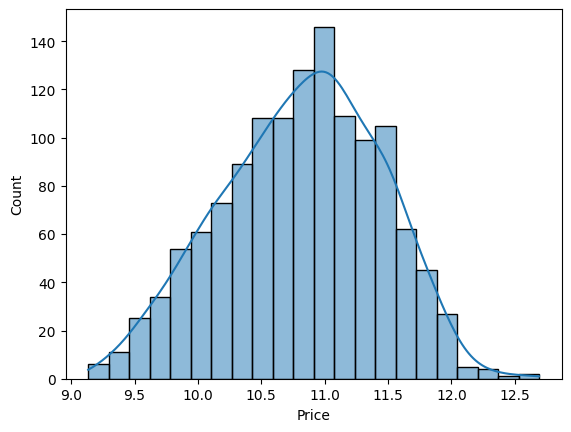

In [191]:
sns.histplot(np.log1p(df['Price']),kde=True)

Not skewed anymore

In [192]:
features_object = [feature for feature in df.columns if df[feature].dtype=='object']
features_object

['Company', 'TypeName', 'Cpu brand', 'GpuBrand', 'OpSysGroup']

In [ ]:
X = df.drop('Price',axis=1)
feature_numreical = [feature for feature in X.columns if X[feature].dtype!='object']
y = np.log1p(df['Price']) # log transforming prices
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=93)

In [195]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(
    transformers=[
    ("OneHotEncoder",OneHotEncoder(drop='first',handle_unknown='ignore'),features_object),
    ("StandardScaler",StandardScaler(),feature_numreical)
    ],
    remainder='passthrough'
)
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [196]:
X_train

array([[ 0.        ,  0.        ,  0.        , ...,  0.39364783,
        -0.80325885,  0.37919729],
       [ 0.        ,  0.        ,  0.        , ...,  0.97778178,
        -0.80325885,  0.37919729],
       [ 0.        ,  0.        ,  0.        , ...,  0.78307046,
        -0.80325885,  0.37919729],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.96933138,
        -0.80325885,  1.73446622],
       [ 0.        ,  0.        ,  0.        , ...,  0.39364783,
         1.16645568, -0.29843717],
       [ 0.        ,  0.        ,  0.        , ..., -2.33231059,
         1.16645568, -0.97607164]], shape=(1106, 40))

In [209]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import root_mean_squared_error,r2_score,mean_absolute_error

In [ ]:
models = {
    "Adaboost":AdaBoostRegressor(),
    "Gradientboost":GradientBoostingRegressor(),
    "Randomforest":RandomForestRegressor(),
    "Decisiontree":DecisionTreeRegressor(),
    "KNN":KNeighborsRegressor(),
    "LinearRegression":LinearRegression(),
    "SupportVector":SVR(),
    "ElasticNet":ElasticNet(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    #"Catboost":CatBoostRegressor(),
    "Xgboost":XGBRegressor()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(list(models.keys())[i])
    print(f" R2 score : {r2_score(y_pred,y_test)}")
    #print(f" mae : {mean_absolute_error(y_pred,y_test)}")

Adaboost
 R2 score : 0.6904151621747989
 mae : 0.21850254183396062
Gradientboost
 R2 score : 0.8208276155006379
 mae : 0.17089881341604746
Randomforest
 R2 score : 0.844751948197594
 mae : 0.16095628416281502
Decisiontree
 R2 score : 0.7838527672106432
 mae : 0.19646808570017196
KNN
 R2 score : 0.7737615448105368
 mae : 0.19030318699283866
LinearRegression
 R2 score : 0.7378716617594998
 mae : 0.2120671159553866
SupportVector
 R2 score : 0.8247437058182358
 mae : 0.16812891707600694
ElasticNet
 R2 score : -1.2298673620036234e+28
 mae : 0.4825724547187836
Ridge
 R2 score : 0.7314545940944297
 mae : 0.2130938894671556
Lasso
 R2 score : -1.2298673620036234e+28
 mae : 0.4825724547187836
Xgboost
 R2 score : 0.8566083364642982
 mae : 0.15445558924876324


In [ ]:
models = {
    "Adaboost":AdaBoostRegressor(),
    "Gradientboost":GradientBoostingRegressor(),
    "Randomforest":RandomForestRegressor(),
    "Decisiontree":DecisionTreeRegressor(),
    "KNN":KNeighborsRegressor(),
    "LinearRegression":LinearRegression(),
    "SupportVector":SVR(),
    "ElasticNet":ElasticNet(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    #"Catboost":CatBoostRegressor(),
    "Xgboost":XGBRegressor()
}
RMSE = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,np.log1p(y_train))
    y_pred = model.predict(X_test)
    print(list(models.keys())[i])
    print(f" R2 score : {r2_score((np.expm1(y_pred)),y_test)}")
    #print(f" mae : {mean_absolute_error(y_pred,y_test)}")

Adaboost
 R2 score : 0.6872319380982286
 mae : 8.370009699670536
Gradientboost
 R2 score : 0.8310956382779535
 mae : 8.371324948996827
Randomforest
 R2 score : 0.8431520401406684
 mae : 8.371675558047782
Decisiontree
 R2 score : 0.787943255731596
 mae : 8.372229982194506
KNN
 R2 score : 0.7732421486023389
 mae : 8.370821604180522
LinearRegression
 R2 score : 0.7287534348162874
 mae : 8.371035793958642
SupportVector
 R2 score : -9.65269320670855
 mae : 8.378476737128933
ElasticNet
 R2 score : -1.1111673427278216e+29
 mae : 8.374237912720544
Ridge
 R2 score : 0.7216631642098931
 mae : 8.371339076244869
Lasso
 R2 score : -1.1111673427278216e+29
 mae : 8.374237912720544
Xgboost
 R2 score : 0.8472045535609971
 mae : 8.373207610536545


Model performs better with Xgboost

In [226]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [100, 200, 300,500,800,1000],
    'max_depth': [3, 5, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 1.5]
}

xgb = XGBRegressor(random_state=93, objective='reg:squarederror')  # For regression
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model and eval
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)
new_r2 = r2_score(y_test, y_pred)
print(f"Best Params: {grid_search.best_params_}")
print(f"Tuned R2: {new_r2}") 
#print(f" mae : {mean_absolute_error(y_pred,y_test)}")

Fitting 5 folds for each of 1536 candidates, totalling 7680 fits
Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}
Tuned R2: 0.8840035463580486


In [231]:
from sklearn.ensemble import StackingRegressor

estimators = [
    ('xgb', XGBRegressor(**grid_search.best_params_)),  # Tuned XGBoost
    ('rf', RandomForestRegressor(n_estimators=200, random_state=93)),
    ('cb',CatBoostRegressor()),
    ('lr', LinearRegression())
]
stack = StackingRegressor(estimators=estimators, final_estimator=LinearRegression(), cv=5)

stack.fit(X_train, y_train)  
y_pred = stack.predict(X_test)
new_r2 = r2_score(y_test, y_pred)
print(f"Stacked R2: {new_r2}")  
#print(f" mae : {mean_absolute_error(y_pred,y_test)}")

Learning rate set to 0.0416
0:	learn: 0.6107144	total: 1.39ms	remaining: 1.39s
1:	learn: 0.5938453	total: 2.42ms	remaining: 1.21s
2:	learn: 0.5772755	total: 3.4ms	remaining: 1.13s
3:	learn: 0.5620140	total: 4.6ms	remaining: 1.15s
4:	learn: 0.5464236	total: 5.66ms	remaining: 1.13s
5:	learn: 0.5322206	total: 6.53ms	remaining: 1.08s
6:	learn: 0.5180989	total: 7.42ms	remaining: 1.05s
7:	learn: 0.5049224	total: 8.36ms	remaining: 1.04s
8:	learn: 0.4922726	total: 9.27ms	remaining: 1.02s
9:	learn: 0.4803025	total: 10.2ms	remaining: 1.01s
10:	learn: 0.4692396	total: 11ms	remaining: 990ms
11:	learn: 0.4577835	total: 11.9ms	remaining: 982ms
12:	learn: 0.4471999	total: 12.8ms	remaining: 975ms
13:	learn: 0.4370495	total: 13.6ms	remaining: 959ms
14:	learn: 0.4276939	total: 14.4ms	remaining: 945ms
15:	learn: 0.4181263	total: 15.9ms	remaining: 978ms
16:	learn: 0.4099618	total: 17.1ms	remaining: 987ms
17:	learn: 0.4018414	total: 18.2ms	remaining: 994ms
18:	learn: 0.3932550	total: 19.5ms	remaining: 1s
1

In [230]:
from sklearn.ensemble import VotingRegressor
estimators = [
    ('rf' ,RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt', GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb' ,XGBRegressor(**grid_search.best_params_)),
]
voting = VotingRegressor(estimators=estimators)
voting.fit(X_train, y_train)  
y_pred = voting.predict(X_test)
new_r2 = r2_score(y_test, y_pred)
print(f"Voting R2: {new_r2}")  
#print(f" mae : {mean_absolute_error(y_pred,y_test)}")

Voting R2: 0.8769726762833983


In [ ]:
model = XGBRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
r2_score(y_pred,y_test)
print(f"r2 score {r2_score(y_pred,y_test)}")
#print(f" mae : {mean_absolute_error(y_pred,y_test)}")

r2 score 0.8566083364642982
 mae : 0.15445558924876324


In [227]:
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)
new_r2 = r2_score(y_test, y_pred)
print(f"Tuned R2: {new_r2}") 
print(f" mae : {mean_absolute_error(np.expm1(y_pred),np.expm1(y_test))}")

Tuned R2: 0.8840035463580486
 mae : 9328.266093797827


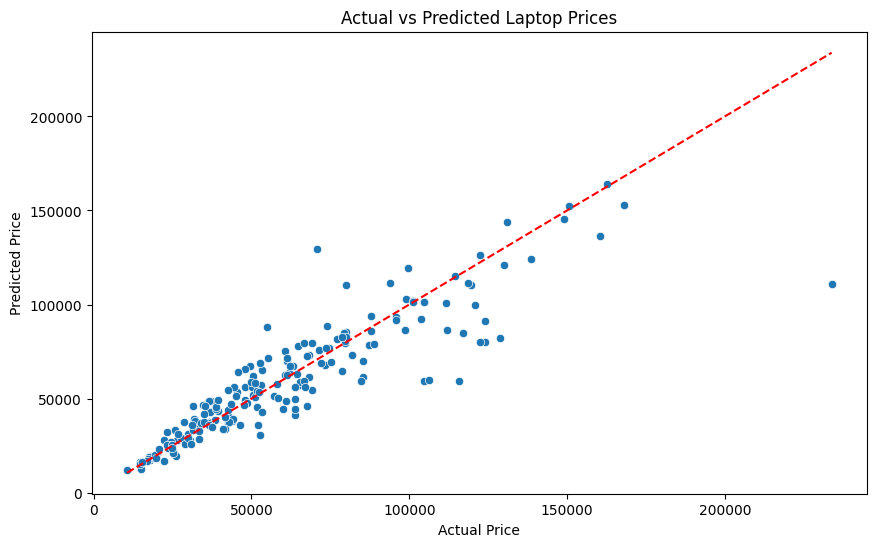

In [228]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=np.expm1(y_test), y=np.expm1(y_pred))
plt.plot([min(np.expm1(y_test)), max(np.expm1(y_test))], [min(np.expm1(y_test)), max(np.expm1(y_test))], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Laptop Prices')
plt.show()

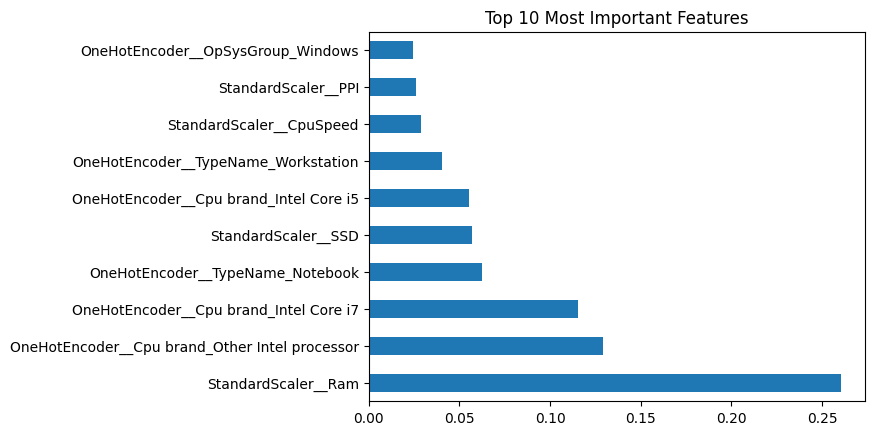

In [229]:
# Getting feature importance from the best estimator
importances = best_xgb.feature_importances_
feature_names = ct.get_feature_names_out()

# Creating a series and plot
feat_importances = pd.Series(importances, index=feature_names)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Most Important Features')
plt.show()

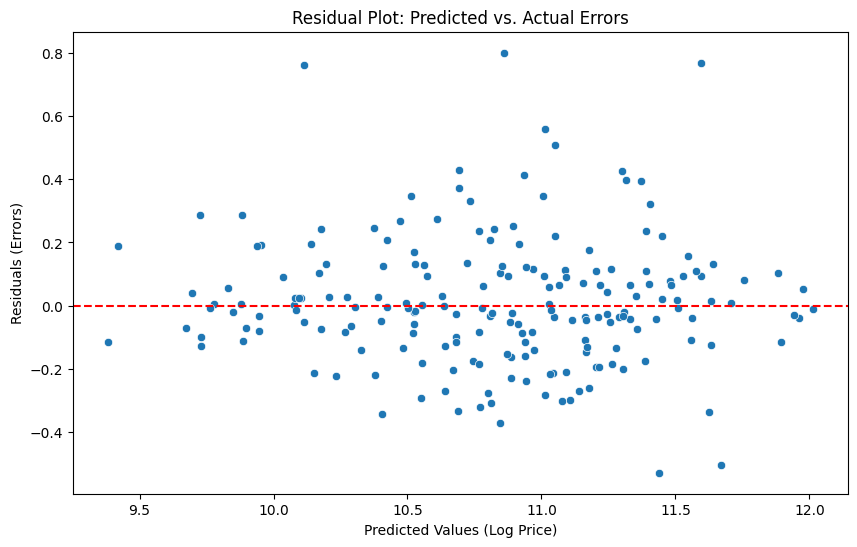

In [225]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--') # The "Zero Error" line
plt.xlabel('Predicted Values (Log Price)')
plt.ylabel('Residuals (Errors)')
plt.title('Residual Plot: Predicted vs. Actual Errors')
plt.show()

In [234]:
import pickle
pickle.dump(best_xgb, open('laptop_model.pkl', 'wb'))
pickle.dump(ct, open('preprocessor.pkl', 'wb'))
df.to_csv('cleaned_laptop_data.csv', index=False)